In [18]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [21]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)

In [22]:
Auto = load_data("Auto")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [23]:
allvars = Auto[["horsepower"]]
y= Auto["mpg"]

X = MS(allvars).fit_transform(Auto)
model = sm.OLS(y,X)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        15:02:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
RSE = np.sqrt(result.mse_resid)
Relativeerror= (RSE/np.mean(y))*100
print(f"Relative error={Relativeerror}, RSE value = {RSE}")



Relative error=20.923714066914833, RSE value = 4.90575691954594


In [25]:
Testset=pd.DataFrame({'horsepower':[98]})
newX = sm.add_constant(Testset,has_constant='add')
newprediction= result.get_prediction(newX)
newprediction.summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


<b>i)</b> Since the p value is < 0.05 this means that a relationship between the predictor (horsepower) and response (mpg) exists</n> 


<b>ii)</b> rsq tells us that roughly 60 % of the variation in mpg is described by horsepower , decent fit , explains 60 percent of the variability, the RSE value is 4.9 which givves us a standard relative error of 20% , meaning our predictions deviate from the actual value by 20 % of th average mpg, if avg is 23 then our predictions will deviate about 4.9 from it.

<b>iii)</b> the relationship is negative as we can see from the horsepower coefficient, meaning , with an increase in the horsepower the value of mpg decreases 

<b>iv)</b> for a horsepower of 98 , the predicted mean value is 24.4 , the confidence and predicted interval both can be referenced above

/tmp/ipykernel_3167/1011505442.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, result.params[0],result.params[1] , 'r--');


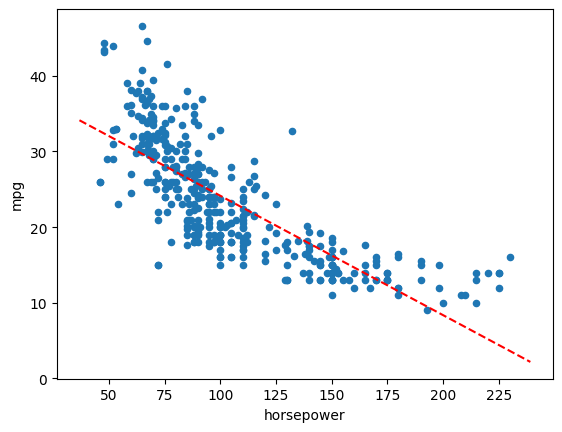

In [26]:
def abline(ax, b , m, *arge):
    "Add a line with a slo[pe m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b, m * xlim[1]+b]
    ax.plot(xlim, ylim, *arge)




ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, result.params[0],result.params[1] , 'r--');

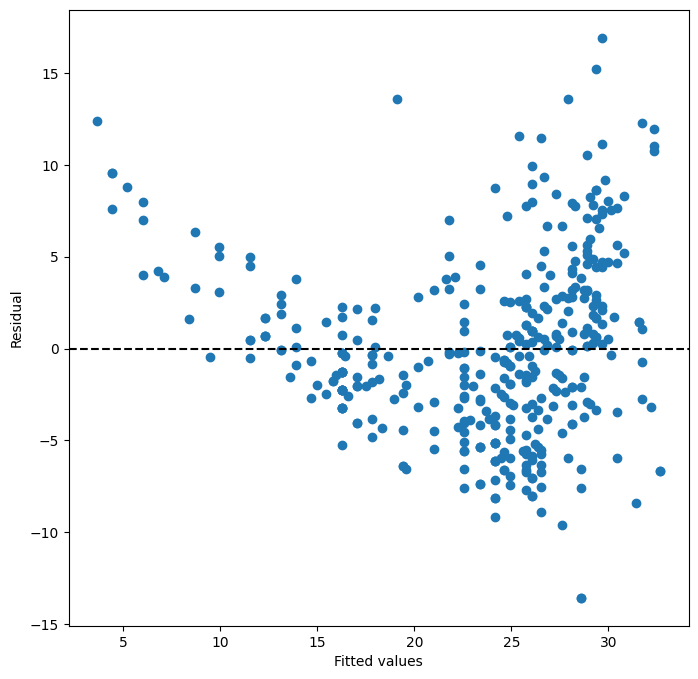

In [27]:
ax= subplots(figsize=(8,8))[1]
ax.scatter(result.fittedvalues, result.resid)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residual")
ax.axhline(c="k", ls = "--");

We can clearly see non linearity in the plot , meaning our model is not that good , the magnitude of residual (y-yhat) is too much in some cases

<b>9</b>

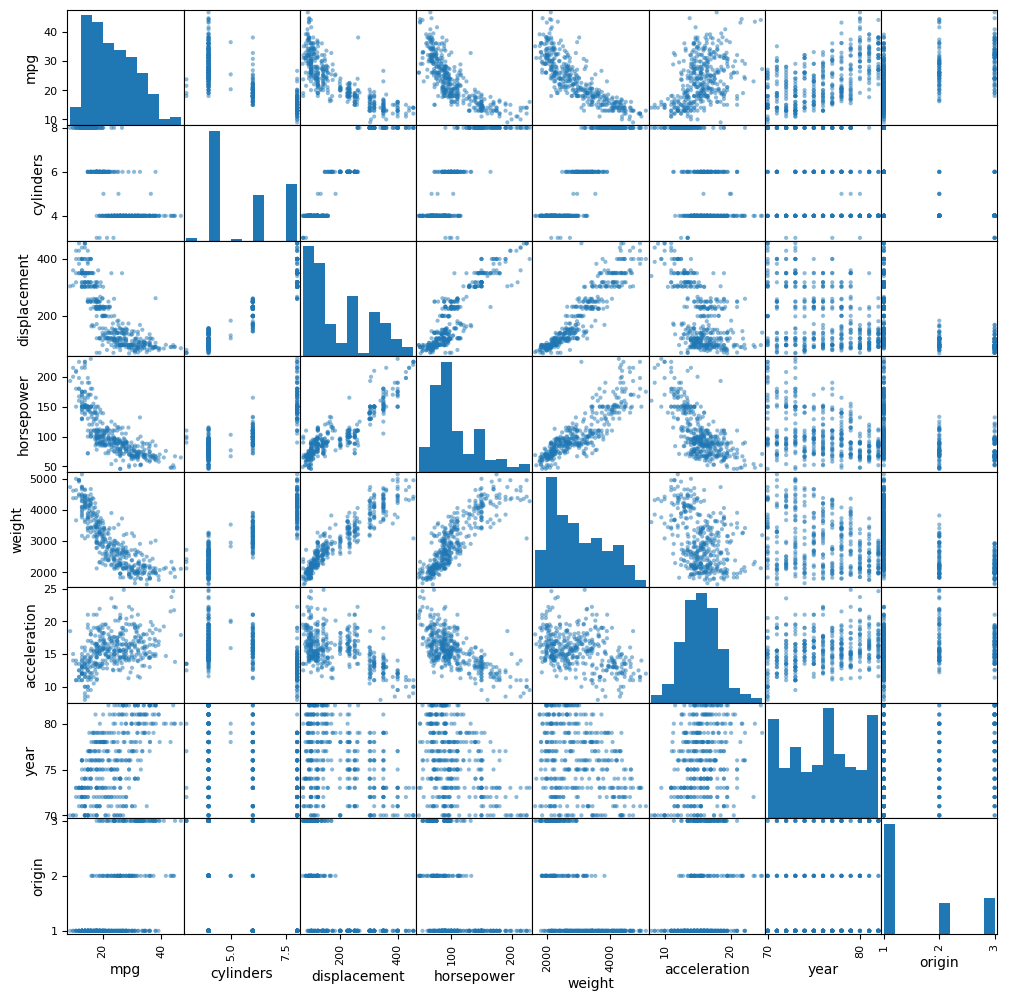

In [28]:
pd.plotting.scatter_matrix(Auto, figsize=(12,12));

In [29]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [30]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [31]:


allvars=list(Auto.columns.drop('mpg'))
formula = 'mpg ~ ' + ' + '.join(allvars)
result2= smf.ols(formula , data= Auto).fit()
result2.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 03 Oct 2025   Prob (F-statistic):          2.04e-139
Time:                        15:02:45   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 The model summary provides detailed statistical information. The high R-squared value (around 0.82) indicates that about 82% of the variance in mpg is explained by the predictors. The F-statistic's high value and very low p-value (Prob(F-statistic)) suggest that the overall model is statistically significant and not due to chance. Looking at the individual p-values for each predictor, displacement, weight, year, and origin appear to be statistically significant, while cylinders, horsepower, and acceleration are not, given the presence of other predictors in the model

In [32]:
anova_lm(result2)

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,14403.083079,14403.083079,1300.683788,2.319511e-125
displacement,1.0,1073.344025,1073.344025,96.929329,1.530906e-20
horsepower,1.0,403.408069,403.408069,36.430140,3.731128e-09
weight,1.0,975.724953,975.724953,88.113748,5.544461e-19
acceleration,1.0,0.966071,0.966071,0.087242,7.678728e-01
year,1.0,2419.120249,2419.120249,218.460900,1.875281e-39
origin,1.0,291.134494,291.134494,26.291171,4.665681e-07
Residual,384.0,4252.212530,11.073470,NaN,NaN


here we can see that all predictors except Acceleration are significant (p alues) with cylinders being the extremely significant ; Cylinders and displacement also explain the most variability in mpg , biggest contributor (TSS) 

The coefficient of year variable suggests that for everyu other predictor constant, a 1 unit change in year the reposne variable that is mpg , increases by 0.7 miles / gallon

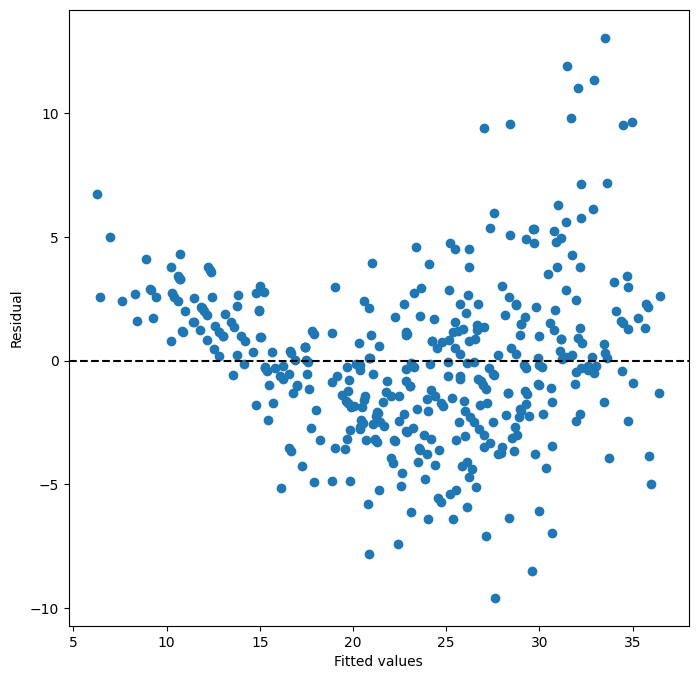

In [33]:
ax= subplots(figsize=(8,8))[1]
ax.scatter(result2.fittedvalues, result2.resid)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residual")
ax.axhline(c="k", ls = "--");

the residual plot clearly shows that despite multiple predictors, the data is still highly non linear , we might end up needing some form of polynomial transformation , and outliers


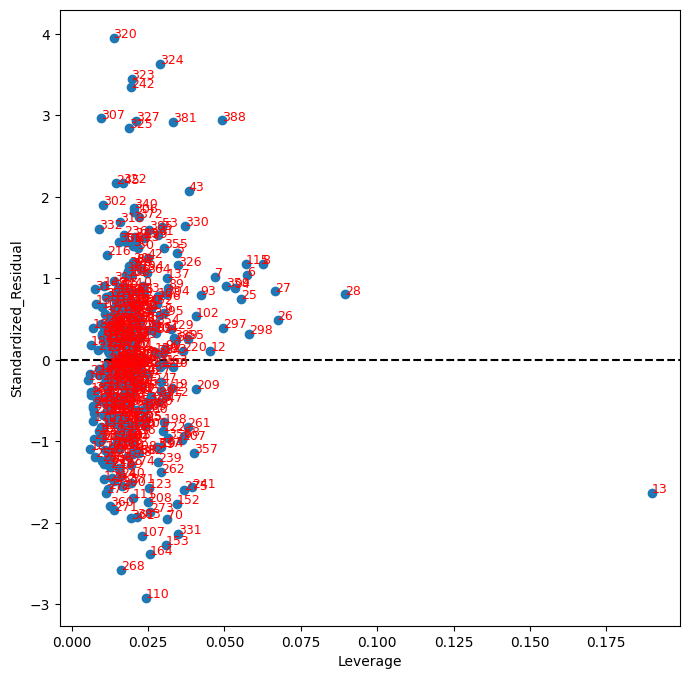

In [35]:
influence = result2.get_influence()
leverage = influence.hat_matrix_diag
standardized_resid = influence.resid_studentized_internal

ax= subplots(figsize=(8,8))[1]
ax.scatter(leverage, standardized_resid)
for i in range(len(leverage)):
    ax.text(leverage[i], standardized_resid[i] , str(i), fontsize=9, color='red')

ax.set_xlabel("Leverage")
ax.set_ylabel("Standardized_Residual")
ax.axhline(c="k", ls = "--");

13th index ot 14th row in the dataframe point has unusually large leverage

In [38]:
Auto.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1


In [40]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Here we see that displacement has a max value in row 14 , it could be a reason that its leverage is so high, one way we can deal with this is to transform our model and displacement , the disp mpg curve is non linear as we see from the corrrelation plots , therefore transforming the model so that it matches the shape can be one ay to deal with the high leverage point